In [1]:
import numpy as np
import matplotlib.pyplot as plt
import argosim

from argosim.antenna_utils import *
from argosim.plot_utils import *
from argosim.data_utils import *
from argosim.clean import *
from argosim.imaging_utils import *

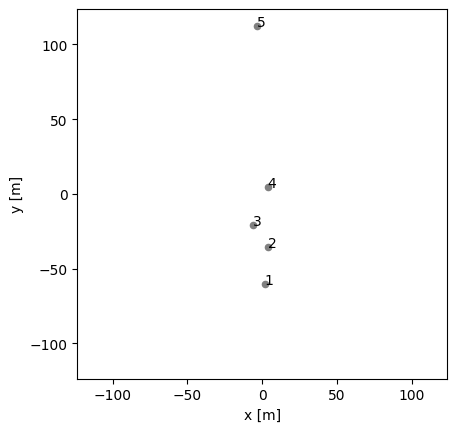

In [2]:
antenna = load_antenna_enu_txt('../configs/arrays/argos_pathfinder.enu.txt')
plot_antenna_arr(antenna)

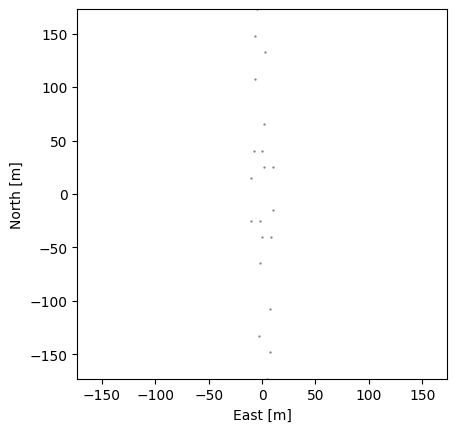

In [3]:
baselines = get_baselines(antenna)
plot_baselines(baselines, ENU=True)

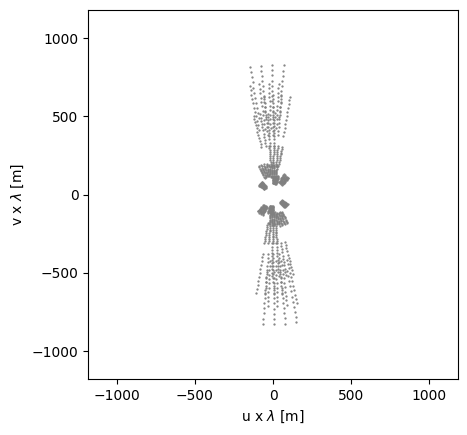

In [18]:
# Multiband parameters
bandwidth = 1000e6
n_freqs = 11
f = 2000e6 # 2 GHz, lambda =
# Source tracking parameters
source_decl = 90./180*np.pi
array_lat = 35./180*np.pi # Heraklion latitud
track_time = 1
delta_t = 15/60 # 300 segs
t_0 = -0.5
n_times = int(track_time/delta_t)

track = uv_track_multiband(baselines, array_lat, source_decl, track_time, t_0, n_times, f, bandwidth, n_freqs)

plot_baselines(track)

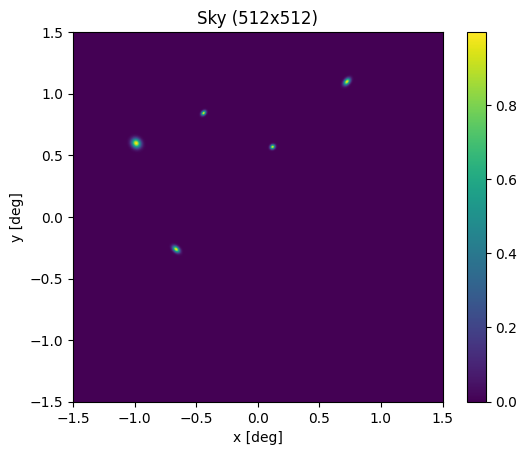

In [19]:
Npx = 512
fov_size = (3., 3.) # 3 degrees FOV from 6 m parabolic dishes.
pix_size_list = [10, 7, 7, 5, 5]
source_intensity_list = [1, 1, 1, 1, 1]
sky = n_source_sky((Npx, Npx), pix_size_list, source_intensity_list)
plot_sky(sky, fov_size)

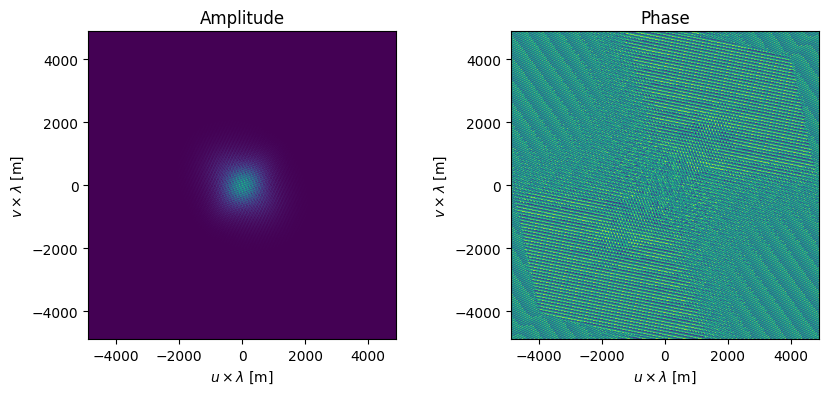

In [20]:
sky_uv = sky2uv(sky)
plot_sky_uv(sky_uv, fov_size)

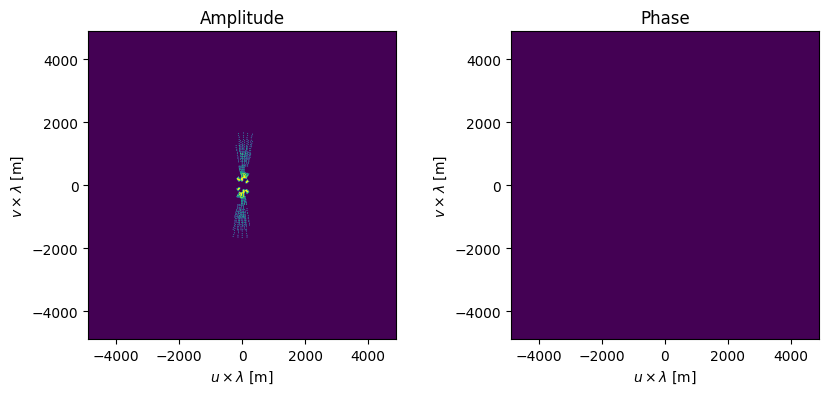

In [21]:
uv_mask, uv_sample_indices  = grid_uv_samples(track, sky_uv.shape, fov_size)
plot_sky_uv(uv_mask, fov_size)

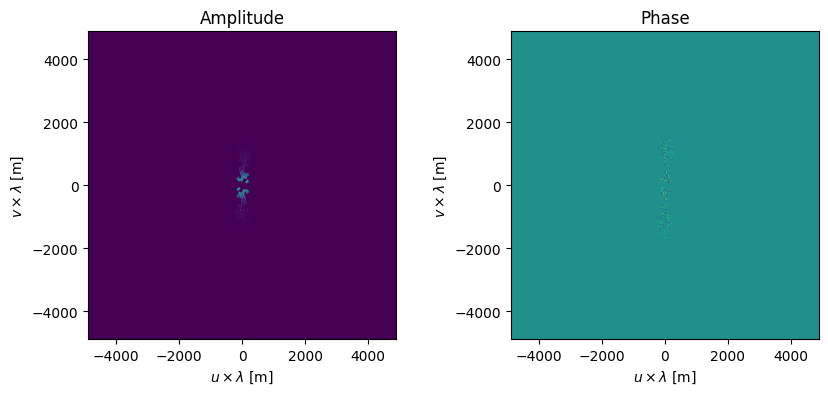

In [22]:
vis = sky_uv*uv_mask+0+0.j # Add 0+0j to avoid alternating phase between 0 and pi where |vis| = 0. 
plot_sky_uv(vis, fov_size)

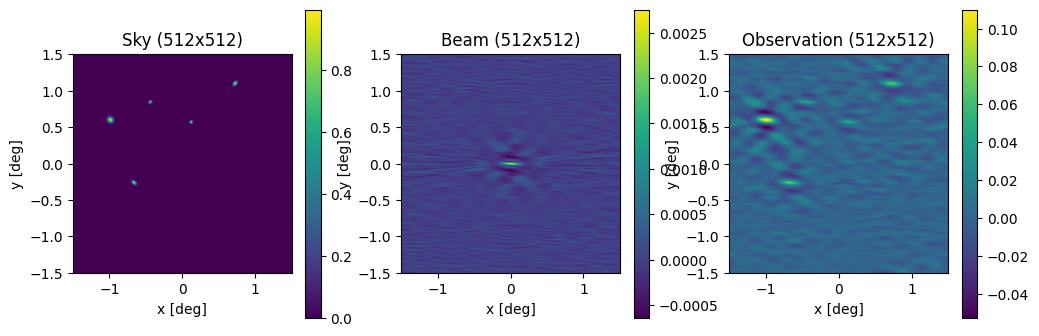

In [23]:
obs = uv2sky(vis)
beam = uv2sky(uv_mask)

fig, ax = plt.subplots(1, 3, figsize=(12,4))
plot_sky(sky, fov_size, ax[0], fig, 'Sky')
plot_sky(beam, fov_size, ax[1], fig, 'Beam')
plot_sky(obs, fov_size, ax[2], fig, 'Observation')

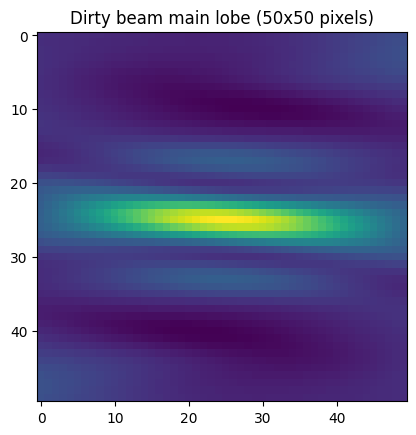

In [24]:
main_lobe_px = 50
plt.imshow(beam[Npx//2-main_lobe_px//2:Npx//2+main_lobe_px//2,Npx//2-main_lobe_px//2:Npx//2+main_lobe_px//2])
plt.title('Dirty beam main lobe ({}x{} pixels)'.format(main_lobe_px, main_lobe_px))
plt.show()


In [31]:
I_clean, sky_model = clean_hogbom(obs, beam, 0.2, 100, 1e-3 , clean_beam_size_px=10)

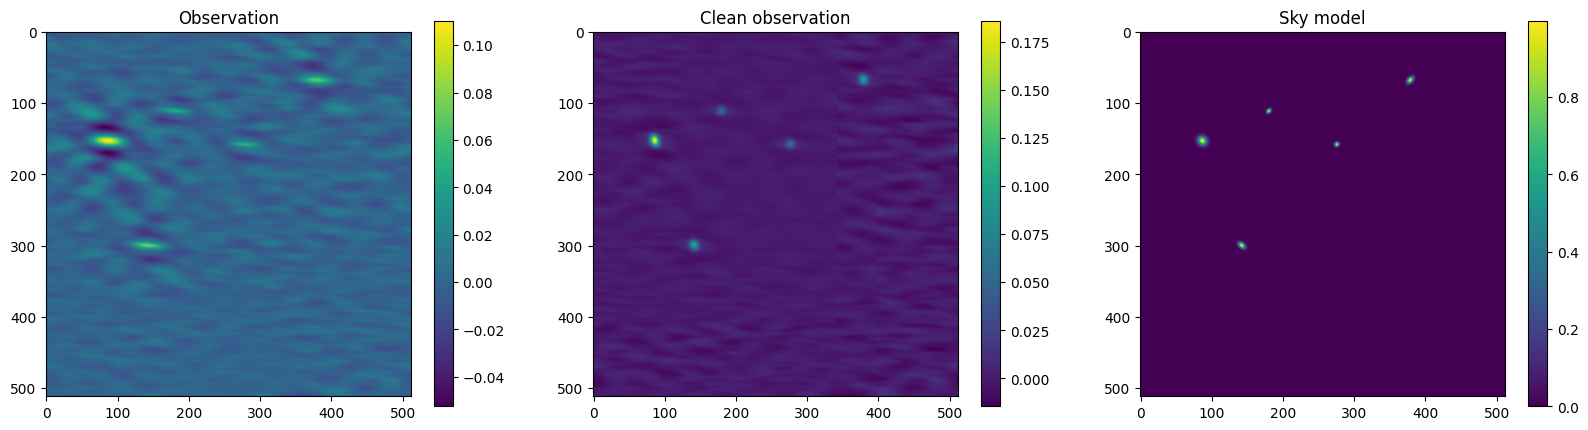

In [32]:
# Plot clean observation
fig, ax = plt.subplots(1,3,figsize=(20,5))
im=ax[0].imshow(obs)
plt.colorbar(im, ax=ax[0])
ax[0].set_title('Observation')

im=ax[1].imshow(I_clean)
plt.colorbar(im, ax=ax[1])
ax[1].set_title('Clean observation')

im=ax[2].imshow(sky)
plt.colorbar(im, ax=ax[2])
ax[2].set_title('Sky model')


# plt.savefig('/home/figures/clean_observation.pdf')
plt.show()